In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy
from wordcloud import WordCloud , STOPWORDS

In [2]:
elon =pd.read_csv('/content/Elon_musk.csv',encoding='latin1')
elon

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [3]:
elon.shape

(1999, 2)

In [4]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [5]:
#remove leading and trailing characters
elon = [y.strip() for y in elon['Text']]
elon

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [6]:
len(elon)

1999

In [7]:
#removing empty strings
elon = [Text for Text in elon if Text]
elon

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [11]:
# Joining the list into one string/text
text = ' '.join(elon)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [12]:
no_punc_text = text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
#Tokenization
from nltk.tokenize import word_tokenize
text_token = word_tokenize(no_punc_text)
text_token

['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 

In [16]:
len(text_token)

21078

In [17]:
text_token[0:50]

['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo']

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
#stopwords removal
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
stop_words.extend(sw_list)
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
""" final_words=[]
  for word in text_tokens:
    if word in stop_words:
      'do nothing
    else:
      final_words.append(word)"""

no_stop_token = [word for word in text_token if not word in stop_words]
print(no_stop_token[0:40])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


In [22]:
lower_words = [x.lower() for x in no_stop_token] #Normalizing Data
print(lower_words[0:25])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last']


In [23]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail']


In [24]:
import en_core_web_sm

In [25]:
nlp = spacy.load('en_core_web_sm')
nlp

In [26]:
doc = nlp(' '.join(no_stop_token))
print(doc[0:40])

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail


In [28]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:40])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9wfkmyu2oj', 'Frodo', 'underdoge', 'all', 'thought', 'would', 'fail']


**FEATURE EXTRACTION**

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [31]:
X

<15562x4970 sparse matrix of type '<class 'numpy.int64'>'
	with 15339 stored elements in Compressed Sparse Row format>

In [33]:
vectorizer.vocabulary_

{'kunalb11': 2702,
 'alien': 231,
 'idaacarmack': 2440,
 'ray': 3621,
 'trace': 4499,
 'cyberpunk': 962,
 'hdr': 1677,
 'nextlevel': 3157,
 'have': 1671,
 'try': 4533,
 'joerogan': 2622,
 'spotify': 4117,
 'great': 1609,
 'interview': 2550,
 'gtera27': 1628,
 'doge': 1115,
 'underestimate': 4665,
 'teslacn': 4343,
 'congratulations': 856,
 'tesla': 4337,
 'china': 740,
 'amazing': 257,
 'execution': 1326,
 'last': 2721,
 'year': 4937,
 'now': 3197,
 'next': 3156,
 'even': 1298,
 'happy': 1658,
 'new': 3153,
 'ox': 3314,
 'httpstco9wfkmyu2oj': 1867,
 'frodo': 1494,
 'underdoge': 4664,
 'all': 234,
 'thought': 4422,
 'would': 4913,
 'fail': 1362,
 'himself': 1723,
 'httpstcozgxjfdzzrm': 2400,
 'owensparks': 3311,
 'flcnhvy': 1436,
 'anonyx10': 286,
 'haha': 1643,
 'thanks': 4381,
 'indeed': 2489,
 'tweets': 4556,
 'definitely': 1017,
 'represent': 3704,
 'realworld': 3646,
 'time': 4441,
 'allocation': 236,
 'the': 4388,
 'entertaining': 1254,
 'outcome': 3291,
 'likely': 2783,
 'givedir

In [ ]:
vectorizer.vocabulary_.keys()

In [ ]:
vectorizer.vocabulary_.values()

In [37]:
vectorizer.vocabulary_.items()

dict_items([('kunalb11', 2702), ('alien', 231), ('idaacarmack', 2440), ('ray', 3621), ('trace', 4499), ('cyberpunk', 962), ('hdr', 1677), ('nextlevel', 3157), ('have', 1671), ('try', 4533), ('joerogan', 2622), ('spotify', 4117), ('great', 1609), ('interview', 2550), ('gtera27', 1628), ('doge', 1115), ('underestimate', 4665), ('teslacn', 4343), ('congratulations', 856), ('tesla', 4337), ('china', 740), ('amazing', 257), ('execution', 1326), ('last', 2721), ('year', 4937), ('now', 3197), ('next', 3156), ('even', 1298), ('happy', 1658), ('new', 3153), ('ox', 3314), ('httpstco9wfkmyu2oj', 1867), ('frodo', 1494), ('underdoge', 4664), ('all', 234), ('thought', 4422), ('would', 4913), ('fail', 1362), ('himself', 1723), ('httpstcozgxjfdzzrm', 2400), ('owensparks', 3311), ('flcnhvy', 1436), ('anonyx10', 286), ('haha', 1643), ('thanks', 4381), ('indeed', 2489), ('tweets', 4556), ('definitely', 1017), ('represent', 3704), ('realworld', 3646), ('time', 4441), ('allocation', 236), ('the', 4388), ('

In [38]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

0
kunalb11            2702
alien                231
idaacarmack         2440
ray                 3621
trace               4499
...                  ...
httpstcowjrzibkh1h  2332
click                774
samwise             3822
gamgee              1530
altho                247

[4970 rows x 1 columns]

In [39]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0, ascending = True)

0
005                 0
10                  1
100                 2
1000                3
10000               4
...               ...
zshauladventure  4965
zubinanary       4966
zwiebelbach      4967
zzcool           4968
ðogecoin         4969

[4970 rows x 1 columns]

In [41]:
print(vectorizer.get_feature_names_out()[50:100])

['23' '230' '24' '240am' '247teslanew' '25' '250' '250kw' '25d'
 '25gunsteslacom' '25k' '25th' '28' '28delayslater' '28th' '29' '2k' '2nd'
 '2v' '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37' '3800'
 '394' '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd' '445pm'
 '448' '4530000' '45thspacewe' '4680' '479000' '48' '4d' '4th']


In [42]:
arr = X.toarray()
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
arr.shape

(15562, 4970)

Bigrams & Trigrams

In [44]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,3),
                                         max_features=100)
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(elon)
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [45]:
print(vectorizer_ngram_range.get_feature_names_out())

['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']


In [46]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Tfidf vectorizer

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_ngram_max_feature = TfidfVectorizer(norm='l2',
                                               analyzer='word',
                                               ngram_range = (1,3),
                                               max_features=10)
tfidf_matrix_ngram_max_feature = vectorizer_ngram_max_feature.fit_transform(elon)
tfidf_matrix_ngram_max_feature

<1999x10 sparse matrix of type '<class 'numpy.float64'>'
	with 3914 stored elements in Compressed Sparse Row format>

In [51]:
print(vectorizer_ngram_max_feature.get_feature_names_out())

['amp' 'co' 'https' 'https co' 'in' 'is' 'of' 'spacex' 'the' 'to']


In [52]:
print(tfidf_matrix_ngram_max_feature.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [55]:
pd.DataFrame(tfidf_matrix_ngram_max_feature.toarray(),
            columns = vectorizer_ngram_max_feature.get_feature_names_out())

amp        co     https  https co        in        is   of  spacex  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0     0.0   
1     0.000000  0.000000  0.000000  0.000000  0.000000  1.000000  0.0     0.0   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0     0.0   
3     0.000000  0.000000  0.000000  0.000000  0.000000  1.000000  0.0     0.0   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0     0.0   
...        ...       ...       ...       ...       ...       ...  ...     ...   
1994  0.434383  0.281219  0.281219  0.281629  0.429888  0.372051  0.0     0.0   
1995  0.768324  0.000000  0.000000  0.000000  0.000000  0.000000  0.0     0.0   
1996  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0     0.0   
1997  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000  0.0     0.0   
1998  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0     0.0   

           the        to  
0     0.000000  0.000000  
1     0.000000  0.000000  
2     0.000000  0.000000  
3     0.000000  0.000000  
4     0.690990  0.722865  
...        ...       ...  
1994  0.345911  0.361868  
1995  0.000000  0.640061  
1996  0.000000  0.000000  
1997  0.000000  0.000000  
1998  0.000000  0.000000  

[1999 rows x 10 columns]

**Generate WordCloud**

In [56]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(60,40))
  plt.imshow(wordcloud)
  plt.axis('off')

In [57]:
stopwords = STOPWORDS
stopwords.add('will')

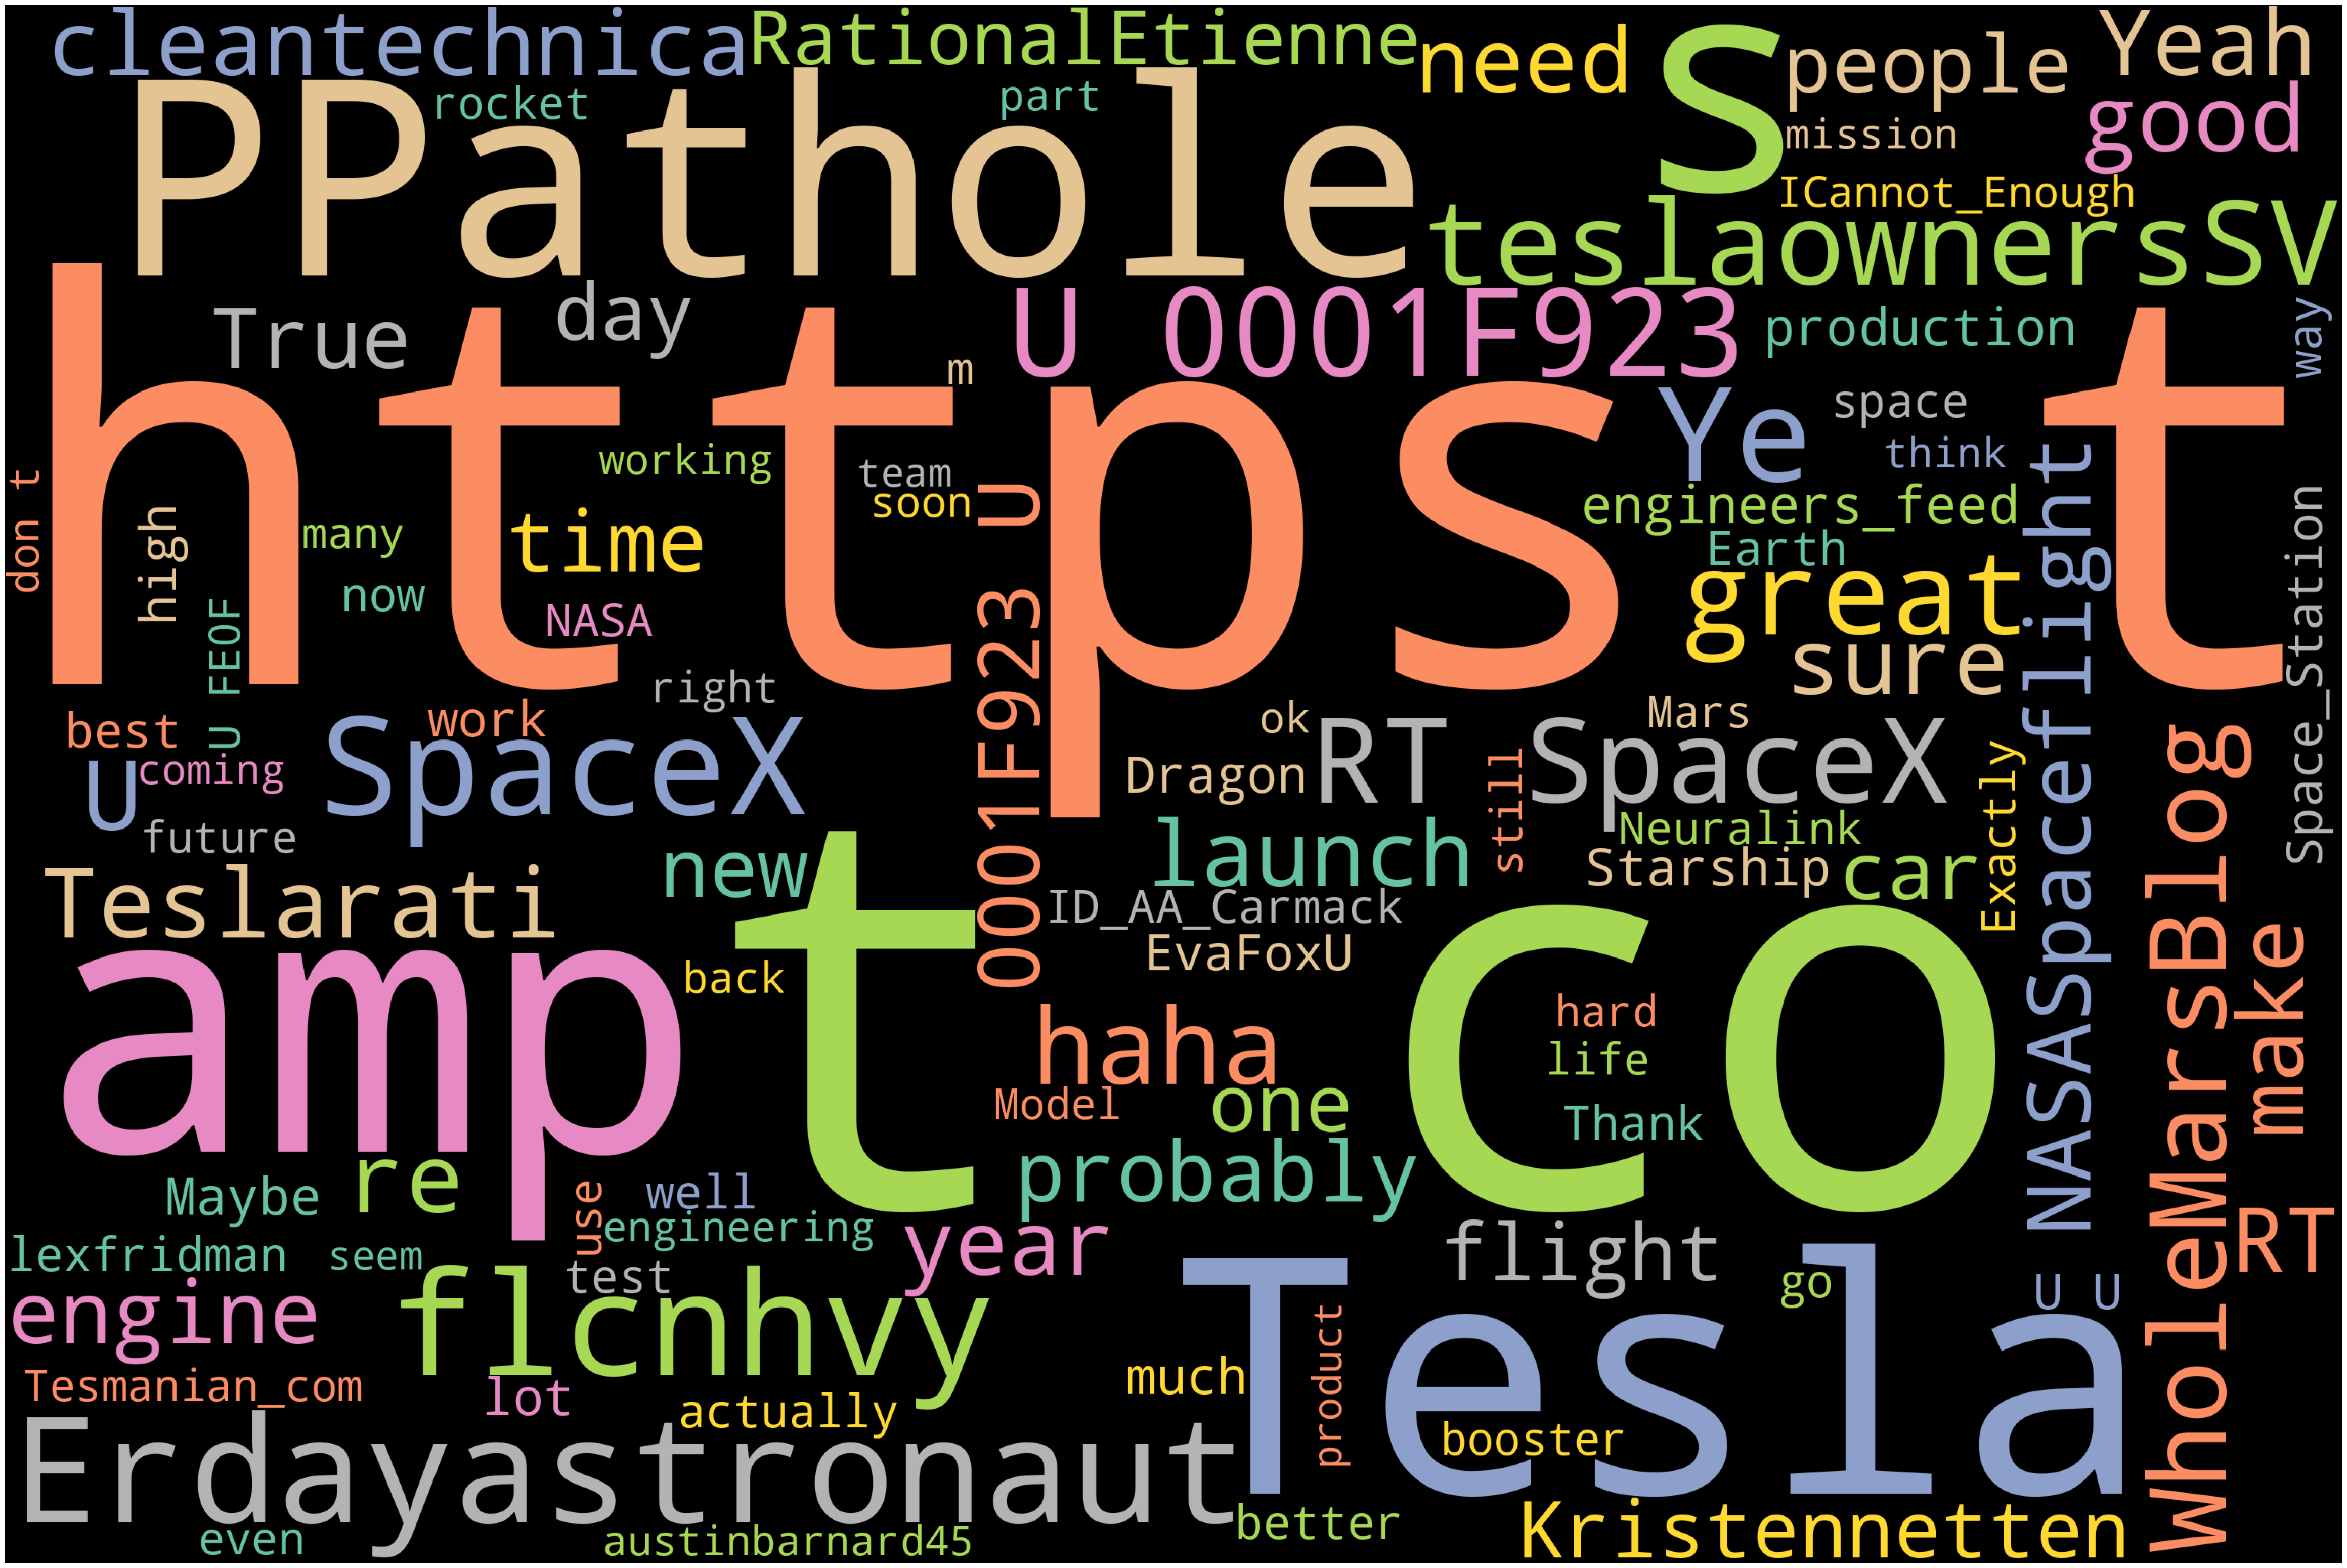

In [58]:
wordcloud = WordCloud(width=3000,
                      height=2000,
                      background_color='black',
                      max_words=100,
                      colormap='Set2',
                      stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

In [59]:
from nltk import tokenize

In [ ]:
sentences = tokenize.sent_tokenize(' '.join(elon))
sentences

In [62]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
922  @kenyanwalstreet Not actually a payout, just a...
923  It may never pay out, as the stock cant b
 ht...
924                                    Details Aug 28.
925  AI symbiosis while u wait @vistacruiser7 @flcn...
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[927 rows x 1 columns]

**Name Entity Recognition**

In [63]:
nlp = spacy.load('en_core_web_sm')

one_block=text
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [64]:
for token in doc_block[100:200]:
    print(token,token.pos_)

most ADV
entertaining ADJ
outcome NOUN
is AUX
the DET
most ADV
likely ADJ
@GiveDirectly ADV
Just ADV
sent VERB
some PRON
Just ADV
agree VERB
to PART
do VERB
Clubhouse PROPN
with ADP
@kanyewest ADJ
https://t.co/3rWE9uHSTS NOUN
@geoffkeighley PROPN
@UnrealEngine NOUN
Its PROPN
getting VERB
real ADJ
Bought VERB
some DET
Dogecoin PROPN
for ADP
lil NOUN
X PROPN
, PUNCT
so SCONJ
he PRON
can AUX
be AUX
a DET
toddler NOUN
hodler NOUN
@JoshManMode PUNCT
He PRON
definitely ADV
has VERB
issues NOUN
, PUNCT
but CCONJ
the DET
sentencing NOUN
seems VERB
a DET
bit NOUN
high ADJ
@freewalletorg NOUN
Thanks NOUN
for ADP
fixing VERB
@freewalletorg PROPN
Please INTJ
unlock VERB
my PRON
account NOUN
@AstroJordy PROPN
< X
U+0001F923><U+0001F923 X
> X
This PRON
is AUX
true ADJ
power NOUN
haha NOUN
https://t.co/Fc9uhQSd7O PUNCT
@freewalletorg INTJ
Any DET
crypto ADJ
wallet NOUN
that SCONJ
wont NOUN
give VERB
you PRON
your PRON
private ADJ
keys NOUN
should AUX
be AUX
avoided VERB
at ADP
all DET
costs NOUN
@f

In [65]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['table', 'missing', 'work', 'go', '@MattWallace888', 'seem', 'bit', '@itsALLrisky', 'appears', 'fixed', '#', 'coins', 'unit', 'time', 'https://t.co/4UH4rARC6', '@kevinmgill', 'launch', 'tower', 'stack', 'Raptors', 'orbit', 'booster', 'Improve', 'ship', '_', 'work', 'tonight', 'video', 'https://t.co/UEEocOfcTb', 'people', 'spoken', 'https://t.co/x41oVMzTGo', '@Nivetha_7_42', '@lexfridman', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'let', 'rainforests', 'come', '@itsALLrisky', 'fun', 'crypto', '@genesimmons', 'simplicity', 'genius', '@AstroJordy', 'decades', 'work', 'Have', 'look', 'notes', 'emails', 'texts', 'learned', 'tell', 'story', 'read', 'https://t.co/Je4EI88HmV', '@Grimezsz', 'heard', 'name', 'years', '@Grimezsz', 'https://t.co/cnOf9yjpF1', 'thing', 'restaurants', 'get', 'hang', 'strangers', 'currency', 'scratch', '@wonderofscience', '@Erdayastronaut', 'said', 'ship', 'landing', 'burn', 'has', 'solution', 'use', 'gas', 'maneuvering', 'thrusters', 'seem', 'tur

In [66]:
#counting noun & verb tokens
cv = CountVectorizer()
X= cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)
words_freq = [(word,sum_words[0,idx])for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1],reverse=True)
wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']

In [67]:
wd_df[0:10]

word  count
0               co    238
1            https    237
2         ppathole     69
3    wholemarsblog     66
4             have     50
5           launch     42
6  nasaspaceflight     37
7             make     33
8           people     32
9             need     31

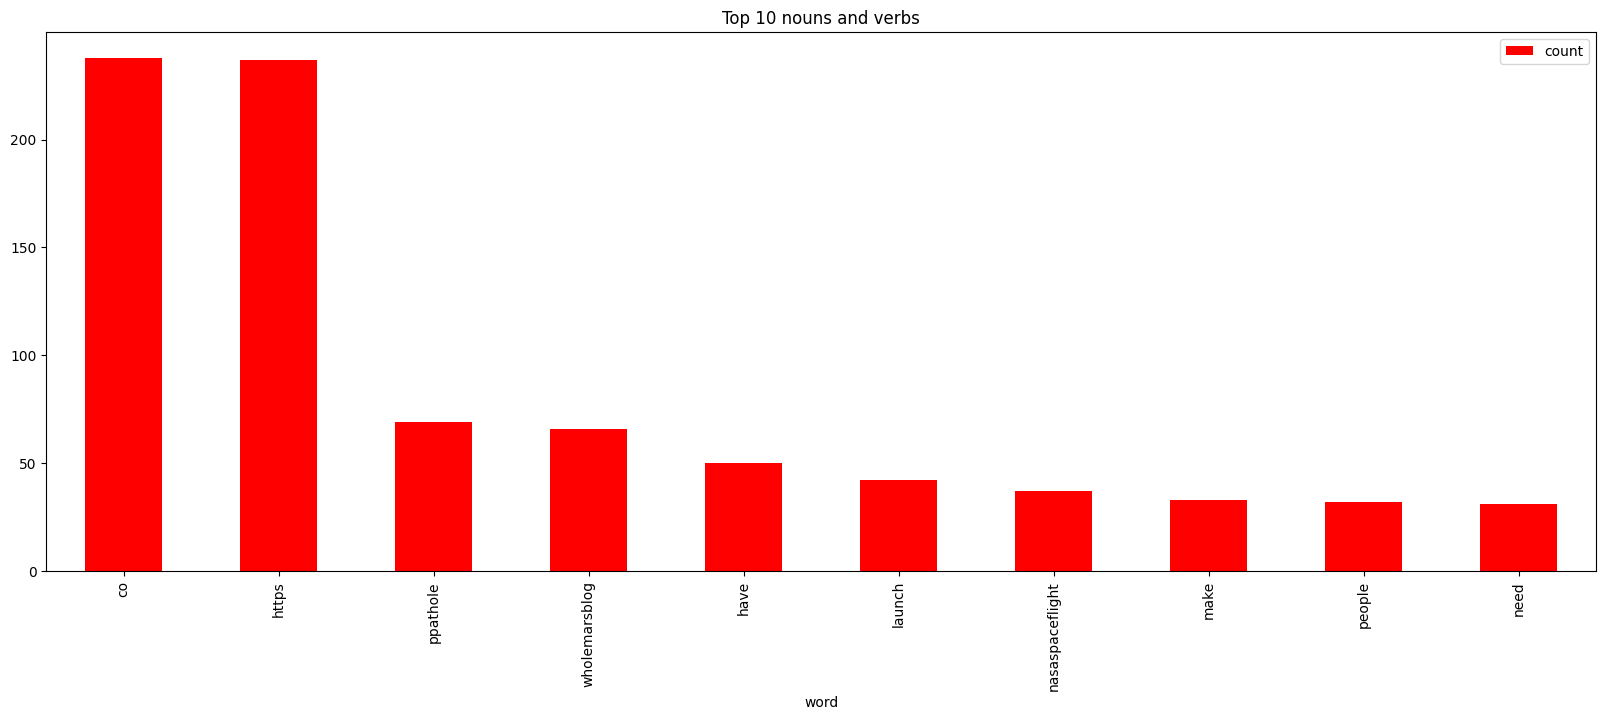

In [68]:
wd_df[0:10].plot.bar(x='word', figsize=(20,7), title='Top 10 nouns and verbs',color='red');

**Emotion Mining Analysis**

In [69]:
from nltk import tokenize

In [ ]:
sentences=tokenize.sent_tokenize(' '.join(elon))
sentences

In [71]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
922  @kenyanwalstreet Not actually a payout, just a...
923  It may never pay out, as the stock cant b
 ht...
924                                    Details Aug 28.
925  AI symbiosis while u wait @vistacruiser7 @flcn...
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[927 rows x 1 columns]

In [73]:
# Emotion Lexicon - Affin
affin=pd.read_csv("/content/Afinn (1).csv",sep=',',encoding='Latin-1')
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [74]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [77]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
  sent_score=0
  if text:
    sentence=nlp(text)
    for word in sentence:
      sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [78]:
calculate_sentiment(text='great')

3

In [79]:
#calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
922    0
923   -4
924    0
925   -2
926    0
Name: sentiment_value, Length: 927, dtype: int64

In [80]:
# how many words are there in a sentence
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
922    11
923    31
924     3
925    47
926    15
Name: word_count, Length: 927, dtype: int64

In [81]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
840  Cool Model 3 review by @iamjamiefoxx https://t...               -8   
650  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
923  It may never pay out, as the stock cant b
 ht...               -4   
683  Occasional flights from land are ok, but frequ...               -4   
..                                                 ...              ...   
648  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13   
588  The open areas
 https://t.co/rabjKrtQlw @Sav...               14   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               16   
722  We just havent observed the
 https://t.co/mez...               17   

     word_count  
840          61  
650          60  
64           11  
923          31  
683          39  
..          ...  
648          65  
588         138  
105          94  
36          231  
722          72  

[927 rows x 3 columns]

In [82]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
4                   Now on to the next for even more!!                0   
5                            Happy New Year of the Ox!                0   
6    https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
..                                                 ...              ...   
922  @kenyanwalstreet Not actually a payout, just a...                0   
923  It may never pay out, as the stock cant b
 ht...               -4   
924                                    Details Aug 28.                0   
925  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  
0            13  
1             4  
4             8  
5             6  
6            14  
..          ...  
922          11  
923          31  
924           3  
925          47  
926          15  

[492 rows x 3 columns]

In [83]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
7    https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...                2   
9    The most entertaining outcome is the most like...                3   
17   Back to work I go @CapybaraSurfer @MattWallace...                4   
..                                                 ...              ...   
914                       He was one of the very best.                3   
916  @Ali_Afshari In general, we need to improve ho...                4   
918  @burakaydik True Wow, IHOP &amp; GitHub are cl...                3   
920               This is both great &amp; terrifying.                3   
921  Everything weve ever sensed or thought has be...                2   

     word_count  
2             4  
3            13  
7            10  
9           109  
17           38  
..          ...  
914           7  
916          87  
918          15  
920           6  
921          17  

[435 rows x 3 columns]

In [84]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
922  @kenyanwalstreet Not actually a payout, just a...                0   
923  It may never pay out, as the stock cant b
 ht...               -4   
924                                    Details Aug 28.                0   
925  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
922          11    922  
923          31    923  
924           3    924  
925          47    925  
926          15    926  

[927 rows x 4 columns]

<ipython-input-85-2a12c2d95f98>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'],color='red')


<Axes: xlabel='sentiment_value', ylabel='Density'>

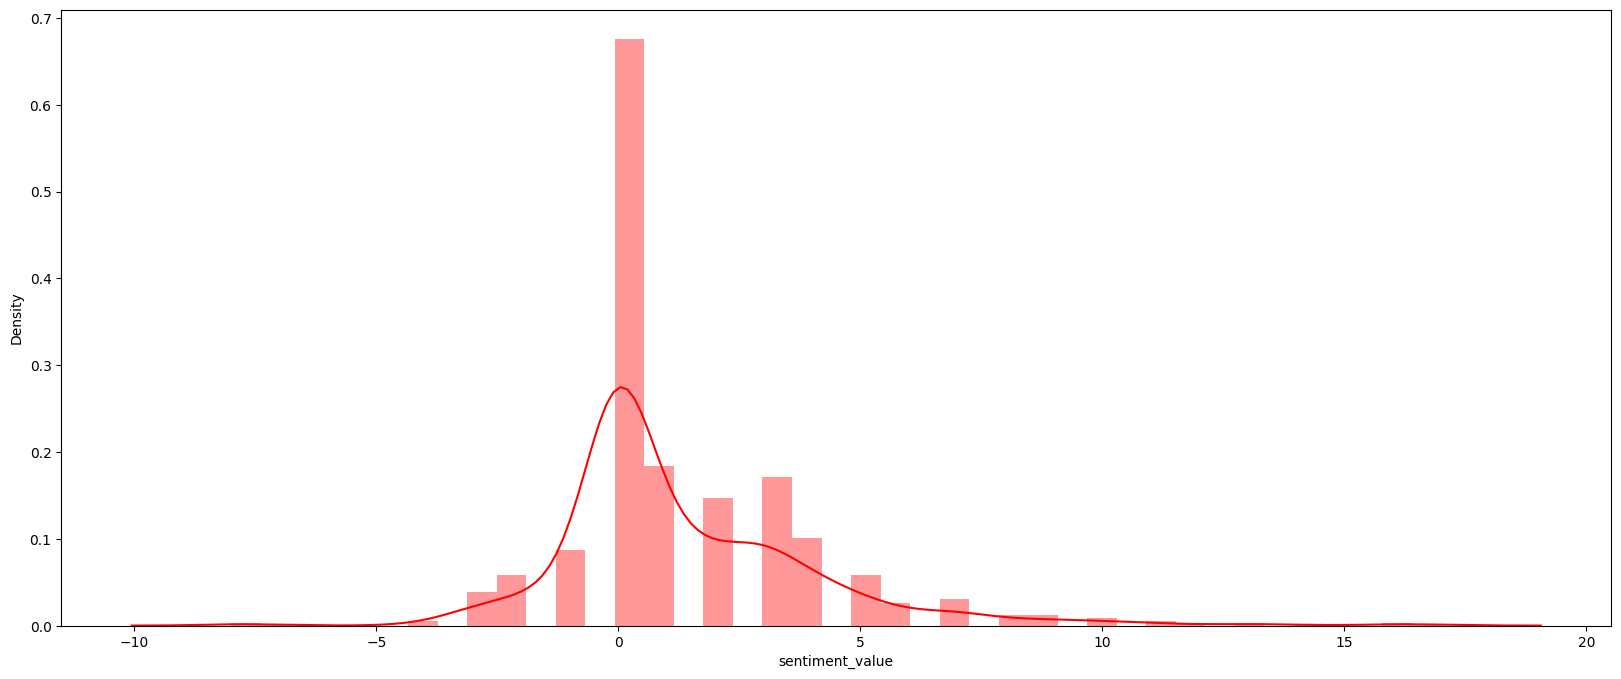

In [85]:
# Plotting the sentiment value for whole review
plt.figure(figsize=(20,8))
sns.distplot(sent_df['sentiment_value'],color='red')

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

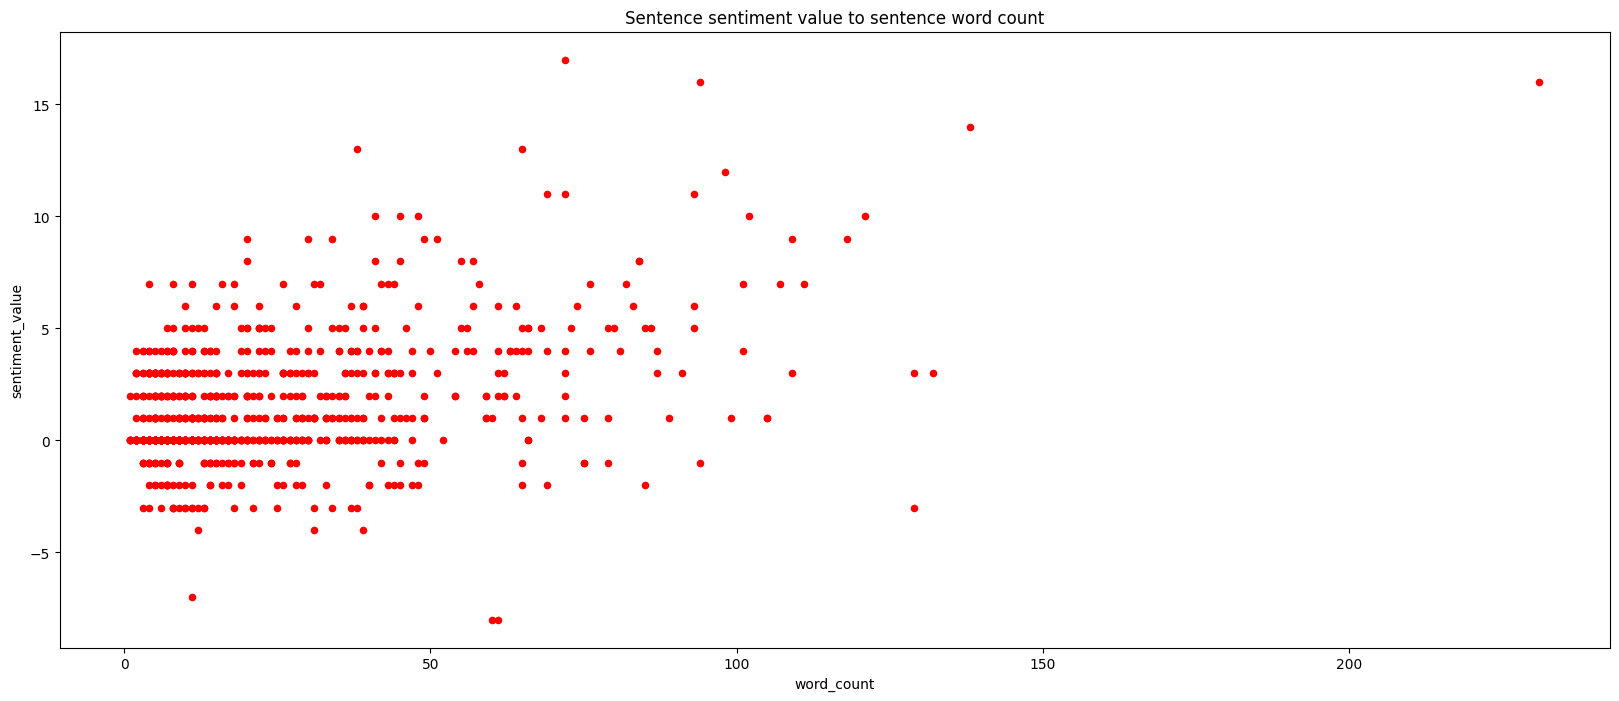

In [86]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',title='Sentence sentiment value to sentence word count',figsize=(20,8),color='red')

In [89]:
sent_df['Sentiment_class']=pd.cut(x=sent_df['sentiment_value'],bins=[-8,-1,0,17],
                                  labels=['Neagtive','Neutral','Positive'],right=True)

<Axes: xlabel='Sentiment_class', ylabel='count'>

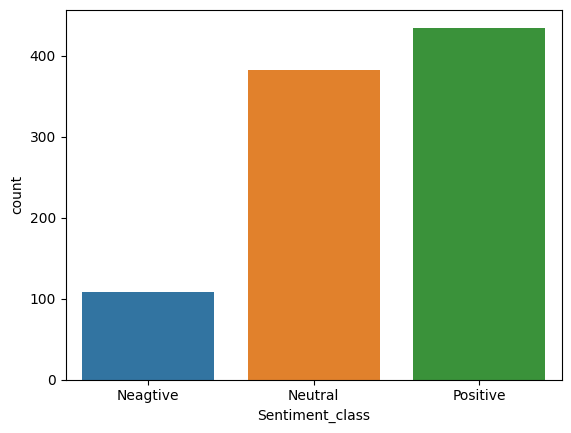

In [90]:
sns.countplot(x='Sentiment_class',data=sent_df)

In [92]:
sent_df['Sentiment_class'].value_counts()

Positive    435
Neutral     382
Neagtive    108
Name: Sentiment_class, dtype: int64